# 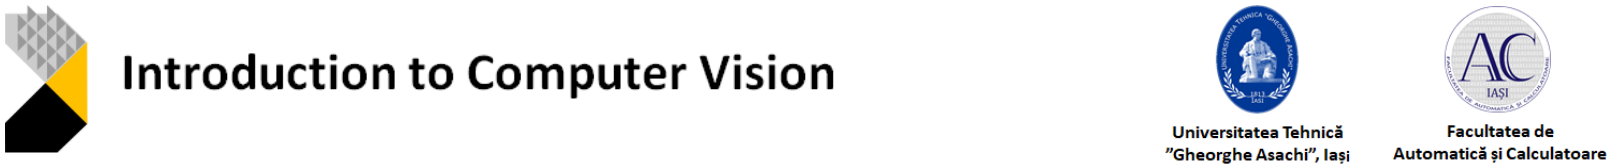

  The 2022 Intro to Computer Vision labs will be run in Google Colaboratory, a Jupyter notebook environment that runs entirely in the cloud, you don't need to download anything. To run these labs, you must have a Google account.

Step 1: click on the assignment invite link -> **Accept this assignment**. Refresh page -> individual repo for the specific assignment is created automatically

Step 2: Navigate to http://colab.research.google.com/github -> Click the **Include Private Repos** checkbox -> **select the correct repo** (SistemeDeVedereArtificiala/assignment_name-student_name) -> Click on the jupyter notebook of the current assignment

Step 3: [GitHub sign-in window] In the popup window, sign-in to your Github account and authorize Colab to read the private files.

Step 4: [in colab] **File** -> **Save a copy to GitHub**. Select the correct repository for the SPECIFIC assignment -> Click the **Include Colab Link** -> Click **OK**

Step 5: [in colab] Navigate to the **Runtime** tab --> **Change runtime type**, under **Hardware accelerator** select **GPU/TPU** (tensor processing unit) according to your needs. 
  
  <font color='red'>Read the suggestions and accomplish all tasks marked with **#TODO**.

!!! At the end of each laboratory **REPEAT step 4 in order to SAVE** the answers to your private repository (individual for each assignment)</font>

# Project 1: Lane Detection

  In the field of Computer Vision, extraction of geometric features from images is a common problem. Different approaches have been proven to be efficient in extracting particular features as part of the solution. Some solutions involve global examination of the input image, while others involve local examination at pixel level. A basic feature of any self-driving system is **Lane Detection.**


## Week 1: edge detection

**Canny edge detector:**
1. This is probably the most widely used edge detector in computer vision
2. Theoretical model: step‐edges corrupted by additive Gaussian noise
3. Canny has shown that the first derivative of the Gaussian closely approximates the operator that optimizes the product of signal‐to‐noise ratio and localization

###Our first Computer Vision pipeline:
1.   Filter image with derivative of Gaussian
```
kernel_size = 5 # Must be an odd number (3, 5, 7...)
smoothed_img = cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)
```
2.   Find magnitude and orientation of gradient
3.   Non-maximum suppression
4.   Linking and thresholding (hysteresis): define two thresholds, low and high,
use the high threshold to start edge curves and the low threshold to continue them
```
low_threshold = 180
high_threshold = 240
canny_img = cv2.Canny(smoothed_img, low_threshold, high_threshold)
```

In [1]:
#TODO: test Canny demo
#go to http://bigwww.epfl.ch/demo/ip/demos/edgeDetector/ and upload image at https://drive.google.com/file/d/1ihgtG3GszspDfkVwmCgts3E-Zjvb7nAi/view?usp=sharing

In [4]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import math
import cv2

In [ ]:
#TODO: add image at https://drive.google.com/file/d/1Ex-H9C-MGRb2hd2L1flV_A-xevPX9wjA/view?usp=sharing to My Drive

In [8]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [64]:
# After executing the cell above, Drive files will be present in "/content/drive/My Drive".
# check for test image
!ls "/content/drive/My Drive/test_img.jpg"

'/content/drive/My Drive/test_img.jpg'


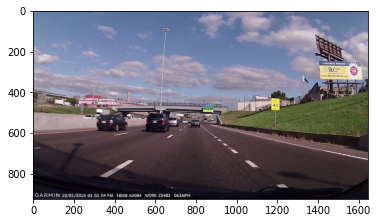

In [65]:
#TODO: read in test image - see cv2.imread
#code here
img = cv2.imread("/content/drive/My Drive/test_img.jpg") 

#TODO: BGR to RGB - see cv2.cvtColor(..., cv2.COLOR_BGR2RGB)
#code here
mod_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


#TODO: print out input image - see plt.imshow from matplotlib.pyplot: https://matplotlib.org/api/pyplot_api.html
#code here

plt.imshow(mod_img)

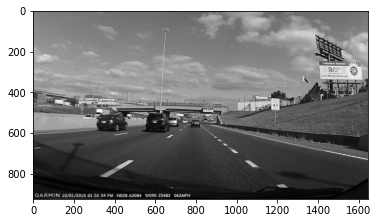

In [66]:
#TODO: apply the grayscale transform - see cv2.cvtColor (use cv2.COLOR_RGB2GRAY)
"""This will return an image with only one color channel, but NOTE: to see the returned image as grayscale
    (assuming your grayscaled image is called 'gray') you should call plt.imshow(gray, cmap='gray')"""
#code here
gray_img = cv2.cvtColor(mod_img, cv2.COLOR_RGB2GRAY)
#TODO: print grayscale image - you should call plt.imshow(gray, cmap='gray')
#code here
plt.imshow(gray_img, cmap='gray')

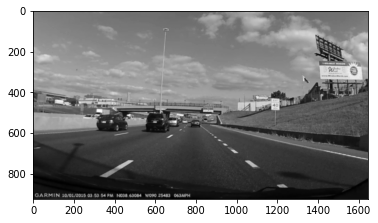

In [68]:
# Gaussian Smoothing

# Define a kernel size for Gaussian smoothing / blurring
kernel_size = 5 # Must be an odd number (3, 5, 7...)

#TODO: apply Gaussian Smoothing - see cv2.GaussianBlur
#code here
gauss_blur = cv2.GaussianBlur(gray_img,(kernel_size,kernel_size),cv2.BORDER_DEFAULT)
#TODO: print smoothed grayscale image - see plt.imshow
#code here
plt.imshow(gauss_blur, cmap='gray')

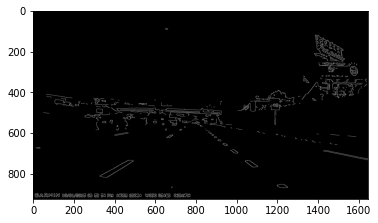

In [69]:
# Canny Edge Detection

# Define parameters for Canny
low_threshold = 180
high_threshold = 240

#TODO: apply Canny - see cv2.Canny
#code here
canny = cv2.Canny(gauss_blur, low_threshold, high_threshold)
#TODO: print Canny edges - see plt.imshow
#code here
plt.imshow(canny, cmap='gray')

###Region of interest:
1.   Define the mask for a lane
* Vertices (trapeze adjusted to image size)
```
rows, cols = image.shape[:2]
  bottom_left  = [0.25*cols, rows]#[0, rows*0.95]
  top_left     = [cols*0.48, rows*0.55]
  bottom_right = [0.75*cols, rows]
  top_right    = [cols*0.52, rows*0.55]
vertices = np.array([[bottom_left, top_left, top_right, bottom_right]], dtype=np.int32)
```
* Mask
```
#defining a blank mask to start with
mask = np.zeros_like(img)
ignore_mask_color = 255
#filling pixels inside the polygon defined by "vertices" with the fill color    
cv2.fillPoly(mask, vertices, ignore_mask_color)
```
2.   Masked image
```
masked_image = cv2.bitwise_and(canny_img, mask)
```



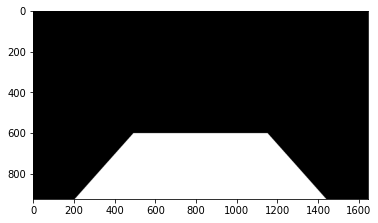

In [81]:
# Region of Interest

#TODO: define vertices (trapeze adjusted to image size)
#code here
rows, cols = gray_img.shape[:2]
bottom_left  = [0.125*cols, rows]#[0, rows*0.95]
top_left     = [cols*0.3, rows*0.65]
bottom_right = [0.875*cols, rows]
top_right    = [cols*0.7, rows*0.65]
vertices = np.array([[bottom_left, top_left, top_right, bottom_right]], dtype=np.int32)

#TODO: create the mask 
# code here - defining a blank mask to start with - see np.zeros_like
mask = np.zeros_like(gray_img)
ignore_mask_color = 255
# filling pixels inside the polygon defined by "vertices" with the fill color  
# see cv2.fillPoly  
cv2.fillPoly(mask, vertices, ignore_mask_color)

#TODO: print mask
#code here
plt.imshow(mask, cmap='gray')

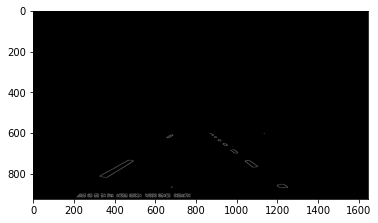

In [82]:
#TODO: Apply the mask to Canny edges - see cv2.bitwise_and
#code here
masked_image = cv2.bitwise_and(canny, mask)
#TODO: print masked Canny edges - see plt.imshow
#code here
plt.imshow(masked_image, cmap='gray')

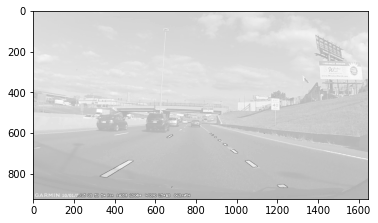

In [87]:
#overlap grayscale image and edges

#inverse the masked edges (edge in black, everything else white)
edges = cv2.bitwise_not(masked_image)

#overlap to initial grayscale image
edges_over_gray = cv2.addWeighted(edges, 0.7, gray_img, 0.3, 0.)

#print overlapped image
plt.imshow(edges_over_gray, cmap='gray')

In [38]:
#TODO: define the following opperations as functions

# 1. grayscale transform
def grayscale(image):
  gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
  return gray

# 2. gaussian smoothing
def gaussian_smoothing(gray, kernel_size):
  smoothed_img = cv2.GaussianBlur(gray_img,(kernel_size,kernel_size),cv2.BORDER_DEFAULT)
  return smoothed_img

# 3. Canny edge detection
def canny_detector(smoothed_img, low_threshold, high_threshold):
  canny_edges = cv2.Canny(smoothed_img, low_threshold, high_threshold)
  return canny_edges

# 4. Region of Interest: define vertices, create the mask (trapeze), apply the mask to Canny edges
def region_of_interest(img):
  rows, cols = img.shape[:2]
  bottom_left  = [0.25*cols, rows]#[0, rows*0.95]
  top_left     = [cols*0.48, rows*0.55]
  bottom_right = [0.75*cols, rows]
  top_right    = [cols*0.52, rows*0.55]
  vertices = np.array([[bottom_left, top_left, top_right, bottom_right]], dtype=np.int32)

  #TODO: create the mask 
  # code here - defining a blank mask to start with - see np.zeros_like
  mask = np.zeros_like(img)
  ignore_mask_color = 255
  # filling pixels inside the polygon defined by "vertices" with the fill color  
  # see cv2.fillPoly  
  cv2.fillPoly(mask, vertices, ignore_mask_color)
  masked_edges = cv2.bitwise_and(canny, mask)
  return masked_edges

# 5. Overlap two images
def overlap(img, a, initial_img, b, c):
  #code here
  edges_over_gray = cv2.addWeighted(img, a, initial_img, b, c)
  return edges_over_gray

In [43]:
#our pipeline as a function
def our_pipeline(image):
    
    #Grayscale
    gray_img = grayscale(image)

    #Gaussian Smoothing
    kernel_size = 23 # Must be an odd number (3, 5, 7...)
    smoothed_img = gaussian_smoothing(gray_img, kernel_size)

    #Canny Edge Detection
    #parameters
    low_threshold = 180
    high_threshold = 240
    canny_img = canny_detector(smoothed_img, low_threshold, high_threshold)

    #Masked Image Within a Polygon
    masked_edges = region_of_interest(canny_img)

    #Overlap edges to grayscale
    #params for transparency 
    a = 0.7
    b = 0.3
    c = 0.0
    #inverse the masked edges (edge in black, everything else white)
    edges = cv2.bitwise_not(masked_edges)
    output = overlap(edges, a, gray_img, b, c)

    return output

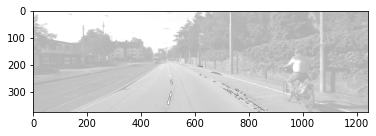

In [44]:
#TODO: apply pipeline to image at https://drive.google.com/file/d/1npaQZlnl5Xlyw6t2Sql_v4QAUiN4vsRY/view?usp=sharing
#TODO: read in test image - see cv2.imread
#code here
image = cv2.imread("/content/drive/My Drive/um_000000.png") 
#TODO: BGR to RGB - see cv2.cvtColor(..., cv2.COLOR_BGR2RGB)
#code here
image =  cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#TODO: apply our_pipeline
#code here
final = our_pipeline(image)
#TODO: print image - see plt.imshow
#code here
plt.imshow(final, cmap='gray')